In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/Flight delays/flight_delays_train.csv")

In [3]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [4]:
len(df["Distance"].unique())

1310

In [5]:
df["Month"] = df["Month"].str.replace("c-", "")
df["DayofMonth"] = df["DayofMonth"].str.replace("c-", "")
df["DayOfWeek"] = df["DayOfWeek"].str.replace("c-", "")

In [6]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,N
1,4,20,3,1548,US,PIT,MCO,834,N
2,9,2,5,1422,XE,RDU,CLE,416,N
3,11,25,6,1015,OO,DEN,MEM,872,N
4,10,7,6,1828,WN,MDW,OMA,423,Y


In [7]:
df["UniqueCarrier"].unique()

array(['AA', 'US', 'XE', 'OO', 'WN', 'NW', 'DL', 'OH', 'AS', 'UA', 'MQ',
       'CO', 'EV', 'DH', 'YV', 'F9', 'AQ', 'TZ', 'HP', 'B6', 'FL', 'HA'],
      dtype=object)

In [8]:
df["Origin"].unique()

array(['ATL', 'PIT', 'RDU', 'DEN', 'MDW', 'MEM', 'PBI', 'MSP', 'ONT',
       'BDL', 'PHX', 'LAS', 'DFW', 'DSM', 'CMH', 'ORF', 'SLC', 'CLT',
       'GSO', 'IAD', 'SMF', 'FLL', 'DAL', 'ORD', 'ITO', 'SAN', 'ROA',
       'LGA', 'SFO', 'GSP', 'SEA', 'DAB', 'SJC', 'LIT', 'LAX', 'OAK',
       'COS', 'OKC', 'GRR', 'JFK', 'BOI', 'MCI', 'BWI', 'BHM', 'CRP',
       'BOS', 'SAT', 'PHL', 'STL', 'CIC', 'AUS', 'IAH', 'COD', 'HNL',
       'RNO', 'BNA', 'TPA', 'MIA', 'EVV', 'PNS', 'EWR', 'RSW', 'ANC',
       'SNA', 'AMA', 'CID', 'DTW', 'DCA', 'LGB', 'MAF', 'MFE', 'BMI',
       'PDX', 'IPL', 'GRB', 'FAR', 'HOU', 'MTJ', 'DRO', 'MLU', 'VPS',
       'TUL', 'CVG', 'SBA', 'PWM', 'IDA', 'MCO', 'ACV', 'CHS', 'BGM',
       'MSY', 'OGG', 'CLE', 'MOB', 'CAK', 'FAY', 'SHV', 'TUS', 'IND',
       'CAE', 'PVD', 'ROC', 'MFR', 'VLD', 'ELP', 'RIC', 'MKE', 'SGF',
       'TYS', 'CHO', 'EGE', 'BIS', 'JAN', 'JAX', 'BUF', 'MSO', 'BGR',
       'CEC', 'ICT', 'MYR', 'ALB', 'LIH', 'SBP', 'AEX', 'GNV', 'SAV',
       'BTM', 'BRO',

In [9]:
df.isna().mean()

Month                0.0
DayofMonth           0.0
DayOfWeek            0.0
DepTime              0.0
UniqueCarrier        0.0
Origin               0.0
Dest                 0.0
Distance             0.0
dep_delayed_15min    0.0
dtype: float64

In [11]:
def int_dates(df):
    df["Month"] = df["Month"].astype(int)
    df["DayOfWeek"] = df["DayOfWeek"].astype(int)
    df["DayofMonth"] = df["DayofMonth"].astype(int)
    return df

In [12]:
df = int_dates(df)

In [14]:
df.dtypes

Month                 int32
DayofMonth            int32
DayOfWeek             int32
DepTime               int64
UniqueCarrier        object
Origin               object
Dest                 object
Distance              int64
dep_delayed_15min    object
dtype: object

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [17]:
df.shape

(100000, 9)

In [18]:
cat_labels = [c for c in df if not pd.api.types.is_numeric_dtype(df[c]) and c != "dep_delayed_15min"]

In [20]:
cat_imputer = Pipeline([
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

In [21]:
preprocessor = ColumnTransformer([
    ("imputer", cat_imputer, cat_labels)
], remainder="passthrough")

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop("dep_delayed_15min", axis=1)
y = df["dep_delayed_15min"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [24]:
from catboost import CatBoostClassifier

In [25]:
model = CatBoostClassifier(verbose=False)

In [28]:
model.fit(X_train_preprocessed, y_train, early_stopping_rounds=50, verbose=False, plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [30]:
from sklearn.metrics import RocCurveDisplay

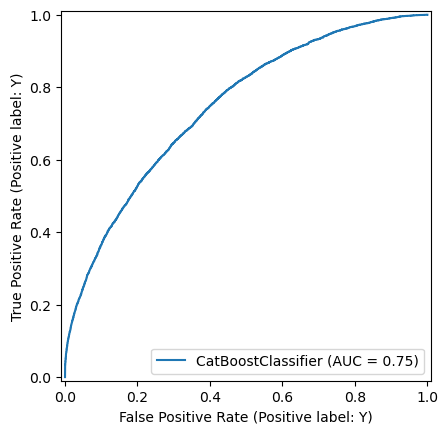

In [33]:
RocCurveDisplay.from_estimator(model, X_test_preprocessed, y_test);

In [34]:
df_test = pd.read_csv("../data/Flight delays/flight_delays_test.csv")

In [35]:
df_test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [36]:
df_test["Month"] = df_test["Month"].str.replace("c-", "")
df_test["DayofMonth"] = df_test["DayofMonth"].str.replace("c-", "")
df_test["DayOfWeek"] = df_test["DayOfWeek"].str.replace("c-", "")

In [37]:
df_test = int_dates(df_test)